In [1]:
%run "../../../PyUtils/common.ipynb"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcess
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.regression.quantile_regression import QuantReg
import statsmodels.formula.api as smf
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


patient = "kimj"
ampm = "pm"
file = "http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20calculated_jlee%20WHERE%20ampm=%27"+ampm+"%27%20AND%20pname=%27"+patient+"%27%20ORDER%20BY%20date,%20time"

lowerPercent = 0.20
upperPercent = 0.80

fileName = file;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
#displayDFs (dfOriginal, maxrows=3 )
#for c in dfOriginal.columns: print (c,  end=', ')
dfOriginal

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,pname,date,ampm,time,pef,pef_zone,tm_window,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,temperature_diff,airpressure_diff,precipitation_diff
0,kimj,2015-02-06,pm,22:36:00,92,R,25.033,0.012,1.300,0.036,0.069,81.000,0.175,16.587,0.483,0.980,1444.967,0.007,0.663,0.019,0.039,57.722,-1.500,0.700,290.000,86.000,4.700,-3.500,1021.600,1026.000,-0.400,6.100,1023.000,93.000,-4.700,1020.700,44.000,10.800,2.300,49.000
1,kimj,2015-02-07,pm,21:43:00,100,R,23.117,0.012,1.300,0.040,0.072,70.000,0.179,17.933,0.378,1.006,1059.400,0.008,0.776,0.016,0.044,45.828,2.900,2.900,270.000,72.000,5.400,-1.600,1015.500,1019.800,0.000,5.100,1021.600,94.000,-2.600,1015.500,49.000,7.700,6.100,45.000
2,kimj,2015-02-08,pm,22:10:00,106,R,24.450,0.006,0.800,0.033,0.024,175.000,0.089,7.177,0.723,0.140,2584.500,0.004,0.294,0.030,0.006,105.706,-9.700,2.400,320.000,42.000,1.200,-20.200,1026.400,1030.900,-5.300,2.900,1026.400,77.000,-10.400,1015.500,29.000,13.300,10.900,48.000
3,kimj,2015-02-09,pm,21:18:00,92,R,23.133,0.009,0.600,0.032,0.028,66.000,0.124,10.030,0.514,0.395,824.300,0.005,0.434,0.022,0.017,35.633,0.300,4.200,270.000,78.000,4.900,-3.000,1019.600,1023.900,-0.100,0.300,1027.300,94.000,-11.400,1019.600,26.000,11.700,7.700,68.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,kimj,2016-02-01,pm,21:33:00,94,R,23.650,0.007,0.600,0.032,0.034,61.000,0.125,11.460,0.581,0.492,1042.950,0.005,0.485,0.025,0.021,44.099,-5.000,1.400,290.000,44.000,1.900,-15.300,1025.100,1029.500,-5.900,-1.000,1027.000,49.000,-7.900,1024.200,25.000,6.900,2.800,24.000
361,kimj,2016-02-02,pm,21:25:00,144,R,23.867,0.011,1.200,0.036,0.064,69.000,0.146,13.955,0.492,0.723,1159.250,0.006,0.585,0.021,0.030,48.572,-4.000,1.500,290.000,50.000,2.300,-12.900,1024.400,1028.800,-5.500,1.200,1026.100,64.000,-9.900,1022.500,24.000,11.100,3.600,40.000
362,kimj,2016-02-03,pm,21:33:00,103,R,24.133,0.011,1.400,0.043,0.073,103.000,0.183,22.265,0.337,1.215,1550.850,0.008,0.923,0.014,0.050,64.262,-2.900,0.000,0.000,74.000,3.700,-6.800,1023.200,1027.600,-3.700,4.700,1025.300,76.000,-9.000,1022.400,35.000,13.700,2.900,41.000
363,kimj,2016-02-04,pm,21:33:00,141,R,24.000,0.012,1.500,0.041,0.067,74.000,0.158,24.135,0.364,1.085,1492.050,0.007,1.006,0.015,0.045,62.169,-0.200,2.200,270.000,65.000,3.900,-5.900,1021.800,1026.100,-1.800,5.600,1024.100,91.000,-4.300,1019.400,27.000,9.900,4.700,64.000


In [2]:
#Break into groups by percentage

dfOriginal.sort_values(by='pef', ascending=True, inplace=True)
dfOriginal.reset_index(drop=True, inplace=True)
numberOfElements = len(dfOriginal)
upperBoundary = upperPercent*numberOfElements
lowerBoundary = lowerPercent*numberOfElements
dfOriginal['percent_group']=-1

for i in dfOriginal.index:

    if i < lowerBoundary:
        dfOriginal['percent_group'][i] = 0

    elif i > upperBoundary : 
        dfOriginal['percent_group'][i] = 2

    else:
        dfOriginal['percent_group'][i] = 1

print(dfOriginal)

    pname        date ampm      time  pef pef_zone  tm_window  so2_max  co_max  o3_max  no2_max  pm10_max  so2_sum  co_sum  o3_sum  no2_sum  pm10_sum  so2_avg  co_avg  o3_avg  no2_avg  pm10_avg  temperaturec  windspeedms  winddirection  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperature_max  airpressure_max  precipitation_max  temperature_min  airpressure_min  precipitation_min  temperature_diff  airpressure_diff  precipitation_diff  percent_group
0    kimj  2015-08-05   pm  22:45:00   62        R     26.100    0.006   0.500   0.070    0.022    44.000    0.101   8.865   0.958    0.311   866.200    0.004   0.340   0.037    0.012    33.188        27.600        0.600        230.000                70.000            25.800                21.600        1006.100             1009.900              25.800           33.600         1006.100             87.000           26.100         1002.200             51.000        

In [3]:
df=dfOriginal.copy()

#1. Remove all the rows that does not have any pef values 

df=df.reset_index(drop=True)

#2. Combine 
df=df.fillna(0)
sdttm = df.date + " " + df.time
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "pef_zone,cname, pname, date, time, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, temperature_diff, airpressure_diff, precipitation_diff, tm_window".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)
#df.to_csv("HanD/hand1.csv", sep=';')

df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df1=df1.drop('sdttm', axis=1, errors='ignore')

nq = 5
lnq=list(range(0,nq))
s= pd.qcut(df1.pef, nq, labels=lnq )
df1.insert(1,"pefcat", s)
df1.pefcat = df1.pefcat.astype(str)





columns =  '''so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,
 temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group'''

#'''pefcat,pef_zone,so2_max,co_max,o3_max,no2_max,temperaturec,windspeedms,precipitationpercent,vaporpressurehpa,
#dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,temperature_min'''

 
#amin,pmin,tmaxlesstmin,amaxlessamin,pmaxlesspmin'''
cs = [c.strip() for c in columns.split(',')]

df1=df1[cs]
#HTML(df1.to_html())
#displayDFs (df1, maxrows=3 )
df1

,so2_max,co_max,o3_max,no2_max,pm10_max,so2_sum,co_sum,o3_sum,no2_sum,pm10_sum,so2_avg,co_avg,o3_avg,no2_avg,pm10_avg,temperaturec,windspeedms,winddirection,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperature_max,airpressure_max,precipitation_max,temperature_min,airpressure_min,precipitation_min,percent_group
sdttm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-06 22:36:00,0.012,1.300,0.036,0.069,81.000,0.175,16.587,0.483,0.980,1444.967,0.007,0.663,0.019,0.039,57.722,-1.500,0.700,290.000,86.000,4.700,-3.500,1021.600,1026.000,-0.400,6.100,1023.000,93.000,-4.700,1020.700,44.000,0
2015-02-07 21:43:00,0.012,1.300,0.040,0.072,70.000,0.179,17.933,0.378,1.006,1059.400,0.008,0.776,0.016,0.044,45.828,2.900,2.900,270.000,72.000,5.400,-1.600,1015.500,1019.800,0.000,5.100,1021.600,94.000,-2.600,1015.500,49.000,1
2015-02-08 22:10:00,0.006,0.800,0.033,0.024,175.000,0.089,7.177,0.723,0.140,2584.500,0.004,0.294,0.030,0.006,105.706,-9.700,2.400,320.000,42.000,1.200,-20.200,1026.400,1030.900,-5.300,2.900,1026.400,77.000,-10.400,1015.500,29.000,1
2015-02-09 21:18:00,0.009,0.600,0.032,0.028,66.000,0.124,10.030,0.514,0.395,824.300,0.005,0.434,0.022,0.017,35.633,0.300,4.200,270.000,78.000,4.900,-3.000,1019.600,1023.900,-0.100,0.300,1027.300,94.000,-11.400,1019.600,26.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-01 21:33:00,0.007,0.600,0.032,0.034,61.000,0.125,11.460,0.581,0.492,1042.950,0.005,0.485,0.025,0.021,44.099,-5.000,1.400,290.000,44.000,1.900,-15.300,1025.100,1029.500,-5.900,-1.000,1027.000,49.000,-7.900,1024.200,25.000,0
2016-02-02 21:25:00,0.011,1.200,0.036,0.064,69.000,0.146,13.955,0.492,0.723,1159.250,0.006,0.585,0.021,0.030,48.572,-4.000,1.500,290.000,50.000,2.300,-12.900,1024.400,1028.800,-5.500,1.200,1026.100,64.000,-9.900,1022.500,24.000,2
2016-02-03 21:33:00,0.011,1.400,0.043,0.073,103.000,0.183,22.265,0.337,1.215,1550.850,0.008,0.923,0.014,0.050,64.262,-2.900,0.000,0.000,74.000,3.700,-6.800,1023.200,1027.600,-3.700,4.700,1025.300,76.000,-9.000,1022.400,35.000,1
2016-02-04 21:33:00,0.012,1.500,0.041,0.067,74.000,0.158,24.135,0.364,1.085,1492.050,0.007,1.006,0.015,0.045,62.169,-0.200,2.200,270.000,65.000,3.900,-5.900,1021.800,1026.100,-1.800,5.600,1024.100,91.000,-4.300,1019.400,27.000,2


In [4]:
# from sklearn.neural_network import MLPClassifier
# nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

# clf = nn;

# Y_SCALER = None
# #Normalize the input and save the scalar for outcome variable "pefmax" in this case.
# scaler = StandardScaler()
# dp = prepareDF(df1, True)
# for c in dp.columns:
#     if ( c == 'pefcat'):
#         #Y_SCALER = StandardScaler()
#         #dp[c] = Y_SCALER.fit_transform(dp[c])
#         pass;
#     else:
#         dp[c] = scaler.fit_transform(dp[c])
        
# #dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]
# dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

# X = dp1.ix[:, dp1.columns != 'pefcat']
# y = dp1.pefcat 
# X = X.as_matrix().astype(np.float)


# kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
# y_pred = y.copy()

# # Iterate through folds\
# i = 0;
# for train_index, test_index in kf.split(X):
#     #print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train = y[train_index]
#     # Initialize a classifier with key word arguments\
#     print ("*",i, end ="");
#     clf.fit(X_train,y_train)
#     y_pred[test_index] = clf.predict(X_test)
#     i = i +1;



Feature space holds 364 observations and 30 features
Unique target labels: [0 1 2]
* 0* 1* 2* 3* 4*
   DecisionTree Gini accuracy: 0.582418 
   DecisionTree Gini r^2 score: -0.068986
* 0* 1* 2* 3* 4*
   DecisionTree Entr accuracy: 0.571429 
   DecisionTree Entr r^2 score: -0.262093
* 0* 1* 2* 3* 4*
                 SVM accuracy: 0.604396 
                 SVM r^2 score: 0.006878
* 0* 1* 2* 3* 4*
       Random Forest accuracy: 0.549451 
       Random Forest r^2 score: -0.358646
* 0* 1* 2* 3* 4*
                K-NN accuracy: 0.527473 
                K-NN r^2 score: -0.475890
* 0* 1* 2* 3* 4*
   Gradient Boosting accuracy: 0.516484 
   Gradient Boosting r^2 score: -0.337956
* 0* 1* 2* 3* 4*
    Logit Regression accuracy: 0.563187 
    Logit Regression r^2 score: -0.117263
* 0* 1* 2* 3* 4*
         Naive Bayes accuracy: 0.428571 
         Naive Bayes r^2 score: -1.013831


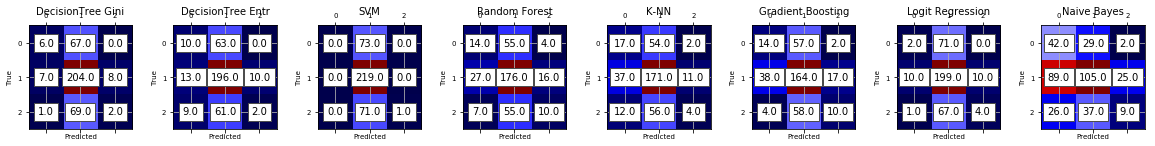

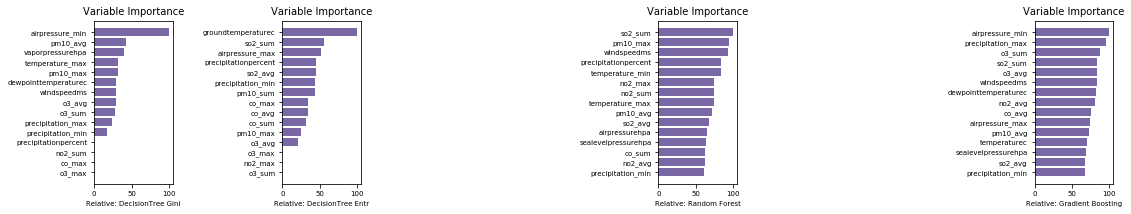

DecisionTree Gini Metrics
             precision    recall  f1-score   support

    class 0       0.43      0.08      0.14        73
    class 1       0.60      0.93      0.73       219
    class 2       0.20      0.03      0.05        72

avg / total       0.49      0.58      0.48       364

DecisionTree Entr Metrics
             precision    recall  f1-score   support

    class 0       0.31      0.14      0.19        73
    class 1       0.61      0.89      0.73       219
    class 2       0.17      0.03      0.05        72

avg / total       0.46      0.57      0.49       364

SVM Metrics
             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00        73
    class 1       0.60      1.00      0.75       219
    class 2       1.00      0.01      0.03        72

avg / total       0.56      0.60      0.46       364

Random Forest Metrics
             precision    recall  f1-score   support

    class 0       0.29      0.19      0.23        73
   

In [5]:
from sklearn.naive_bayes import GaussianNB

predictColumn = "pefcat"
predictColumn = "pef_zone"
predictColumn = "percent_group"

if ( 'pefcat' in df1.columns ):
    df1.pefcat = df1.pefcat.astype(int)
    df1=df1.drop('pefcat', axis=1)

cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini"),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy"), 
        "SVM"               , sklearn.svm.SVC(kernel="linear"), 
#        "SVM1"              , SVC(kernel="rbf", C=10**3),
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        "K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        "Gradient Boosting" , sklearn.ensemble.RandomForestClassifier(),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(),
#        "Neural NW"         , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25, 10), random_state=1),
        "Naive Bayes"       , GaussianNB()
];

y = df1[predictColumn]
X = df1.drop(predictColumn, axis=1)
a = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

for i in cls:
    if type(i) is str:
        y_pred = a[4][i]
        target_names = ['class 0', 'class 1', 'class 2']
        print(i + ' Metrics')
        y.replace(to_replace="R", value=0, inplace=True, limit=None, regex=False, method='pad', axis=None)
        y.replace(to_replace="Y", value=1, inplace=True, limit=None, regex=False, method='pad', axis=None)
        print(classification_report(y, y_pred, target_names=target_names))


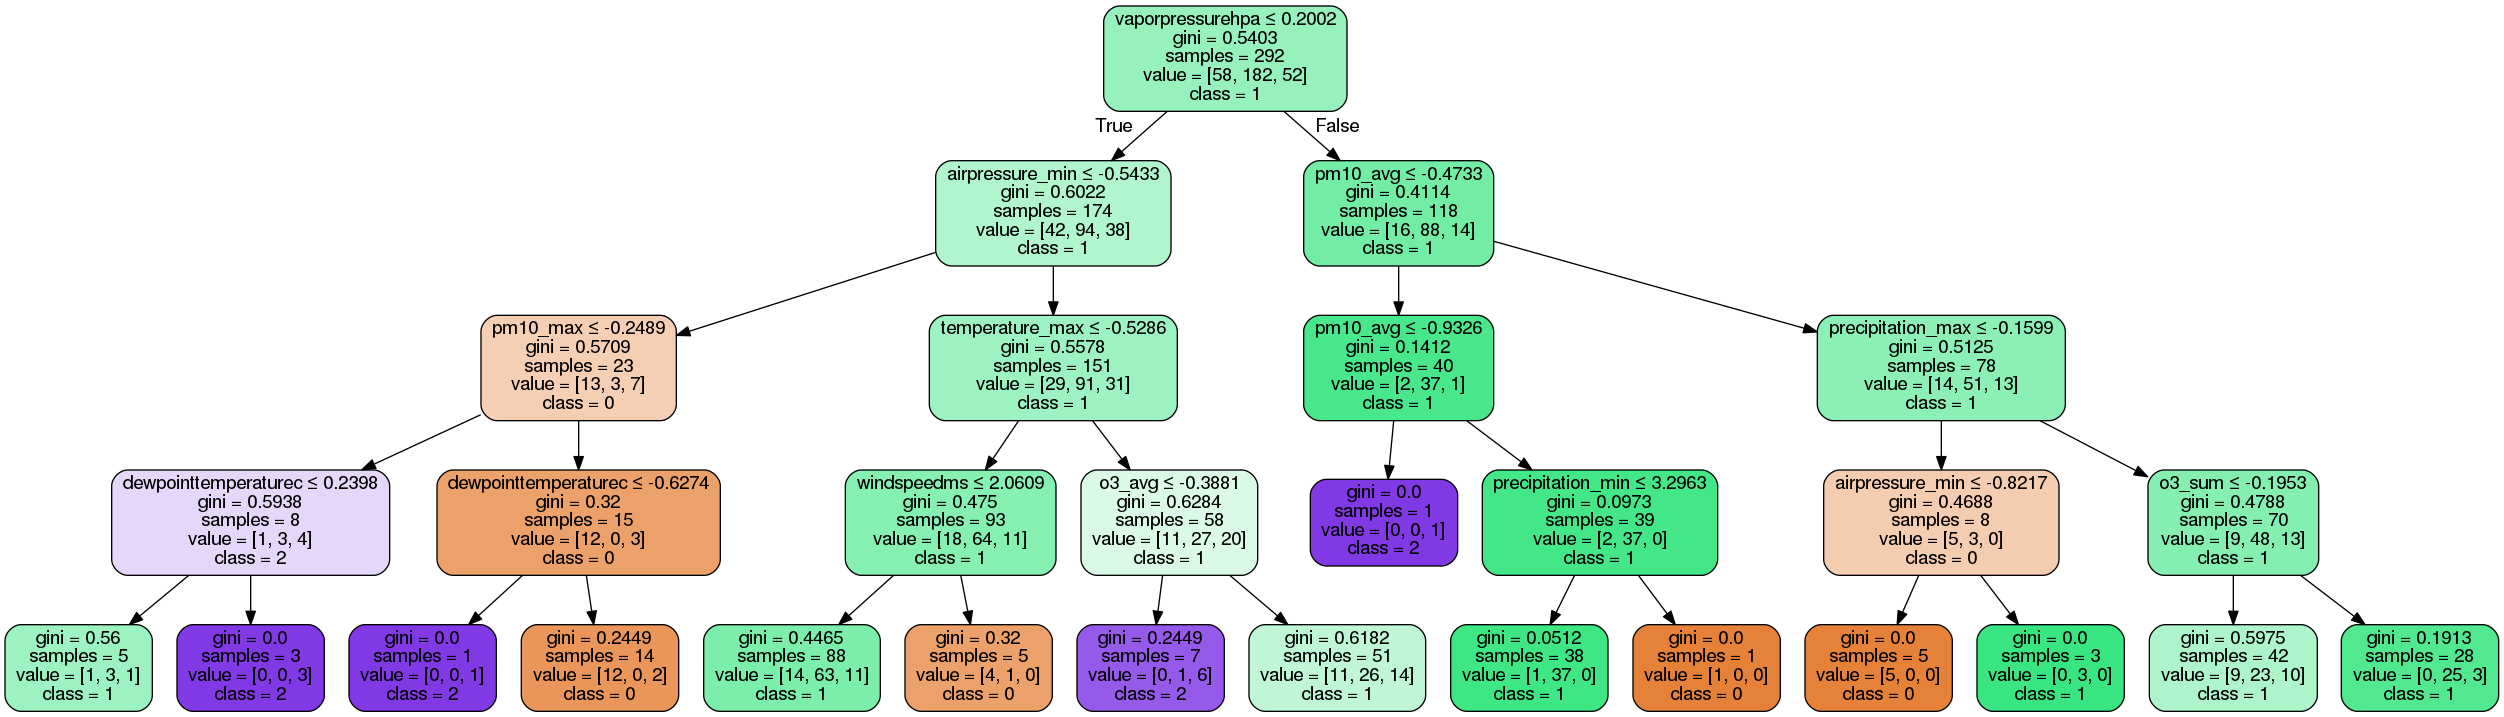

In [6]:
#(X1,y1,ra,cls) = Classify1(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=False)
DrawDecisionTree(X,y, cls[1])
